### The problem solution 

This tutorial presents how to solve with Physics-Informed Neural Networks for a 2D Poisson problem with Dirichlet boundary conditions.

The problem is written as:
\begin{equation}
\begin{cases}
-\Delta u = -\pi^2\sin{(\pi x)} \sin{(\pi y)} \text{ in } D, \\
u = 0 \text{ on } \Gamma_1 \cup \Gamma_2 \cup \Gamma_3 \cup \Gamma_4,
\end{cases}
\end{equation}
where $D$ is a square domain $[0,1]^2$, and $\Gamma_i$, with $i=1,...,4$, are the boundaries of the square.

In [1]:
import numpy as np
import torch
from torch.nn import Tanh


from problem.pinn import PINN
from model.feed_forward import FeedForward
from problem.plotter import Plotter

from model.feed_forward import FeedForward
from poisson import Poisson

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

problem = Poisson()
model = FeedForward(
    layers=[64, 64, 64, 64],
    func=Tanh,
    output_variables=problem.output_variables,
    input_variables=problem.input_variables
)

pinn = PINN(
    problem,
    model,
    lr=0.001,
    error_norm='mse',
    regularizer=1e-8, 
    device=device,
    )



In [3]:
pinn.span_pts(n=20, mode='grid', locations=['gamma1', 'gamma2', 'gamma3', 'gamma4'])
pinn.span_pts(n=20, mode='grid', locations=['D'])

pinn.train(500, 100)
# pinn.save_state('pina.poisson')

              sum          gamma1nil_di gamma2nil_di gamma3nil_di gamma4nil_di Dlaplace_equ 
[epoch 00000] 8.392256e-02 1.320019e-02 9.241897e-04 2.457506e-03 9.753743e-03 5.758693e-02 
              sum          gamma1nil_di gamma2nil_di gamma3nil_di gamma4nil_di Dlaplace_equ 
[epoch 00001] 7.826853e-02 4.817444e-03 1.447591e-02 2.043584e-02 9.047760e-03 2.949158e-02 
              sum          gamma1nil_di gamma2nil_di gamma3nil_di gamma4nil_di Dlaplace_equ 
[epoch 00100] 3.488402e-03 2.413582e-04 2.141516e-04 4.763309e-04 4.355693e-05 2.513004e-03 
              sum          gamma1nil_di gamma2nil_di gamma3nil_di gamma4nil_di Dlaplace_equ 
[epoch 00200] 3.410101e-03 1.505599e-04 4.042727e-04 8.960356e-05 1.043317e-03 1.722348e-03 
              sum          gamma1nil_di gamma2nil_di gamma3nil_di gamma4nil_di Dlaplace_equ 
[epoch 00300] 1.790760e-03 9.056012e-05 1.932413e-04 3.222517e-05 2.406530e-04 1.234080e-03 
              sum          gamma1nil_di gamma2nil_di gamma3nil_di gamm

0.0025584667455404997

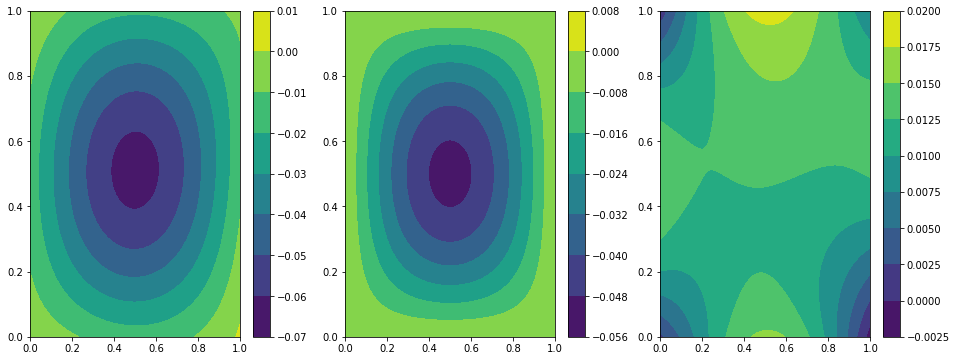

In [4]:
plotter = Plotter()
plotter.plot(pinn)